In [130]:
import pandas as pd
import missingno as msn
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import spacy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as Sia

In [50]:
path_info = 'data/books_data.csv'
path_rating = 'data/Books_rating.csv'

# 1. Data Wrangling

## *Load the dataframe*

In [8]:
info_books = pd.read_csv(path_info)
rating_books = pd.read_csv(path_rating)

## *Clean data*

In [9]:
info_books.dropna(axis=0, how='any')
rating_books.dropna(axis=0, how='any')

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
10,0829814000,Wonderful Worship in Smaller Churches,19.40,AZ0IOBU20TBOP,Rev. Pamela Tinnin,8/10,5.0,991440000,Outstanding Resource for Small Church Pastors,"I just finished the book, &quot;Wonderful Wors..."
11,0829814000,Wonderful Worship in Smaller Churches,19.40,A373VVEU6Z9M0N,Dr. Terry W. Dorsett,1/1,5.0,1291766400,Small Churches CAN Have Wonderful Worship,Many small churches feel like they can not hav...
12,0829814000,Wonderful Worship in Smaller Churches,19.40,AGKGOH65VTRR4,"Cynthia L. Lajoy ""Cindy La Joy""",1/1,5.0,1248307200,Not Just for Pastors!,I just finished reading this amazing book and ...
13,0829814000,Wonderful Worship in Smaller Churches,19.40,A3OQWLU31BU1Y,Maxwell Grant,1/1,5.0,1222560000,Small church pastor? This is the book on worship,I hadn't been a small church pastor very long ...
14,0595344550,Whispers of the Wicked Saints,10.95,A3Q12RK71N74LB,Book Reader,7/11,1.0,1117065600,not good,I bought this book because I read some glowing...
...,...,...,...,...,...,...,...,...,...,...
2999953,0786182431,Very Bad Deaths: Library Edition,90.00,A1EC8SNPR56CLU,Denis Dube,0/0,4.0,1285804800,It's the way he writes it,"""Very Bad Death"" is a so so story, but the cha..."
2999954,0786182431,Very Bad Deaths: Library Edition,90.00,A33VKWCAV9QQKC,"Paige E. Steadman ""RuneEnigma""",0/0,5.0,1230249600,"Bad Deaths, Great Book!",Very Bad Deaths was a very great book! Spider ...
2999955,0786182431,Very Bad Deaths: Library Edition,90.00,A2PK3NTC9RMEF4,S. Potter,0/0,3.0,1179705600,Still read it.,Anything by Spider Robinson is worth reading. ...
2999956,0786182431,Very Bad Deaths: Library Edition,90.00,A2D0PY6HIGTYIT,"Adrian in Phoenix ""No Time for Fantasy""",5/8,5.0,1111276800,Not another Callahan story,Great novel! Easy & enjoyable to read straight...


## *Analyze Columns*

In [11]:
info_books.columns

Index(['Title', 'description', 'authors', 'image', 'previewLink', 'publisher',
       'publishedDate', 'infoLink', 'categories', 'ratingsCount'],
      dtype='object')

In [12]:
rating_books.columns

Index(['Id', 'Title', 'Price', 'User_id', 'profileName', 'review/helpfulness',
       'review/score', 'review/time', 'review/summary', 'review/text'],
      dtype='object')

In [19]:
info = info_books.drop(["image", "previewLink", "publisher", "infoLink"], axis=1)

In [24]:
ratings = rating_books.drop(["profileName", "review/time", "review/helpfulness", "review/summary"], axis=1)

## *Enhance data accessibility*

In [25]:
info.rename(columns={'Title': 'book_title', 'authors': 'book_author', 'publishedDate': 'published_date',
                             'ratingsCount': 'ratings_count'}, inplace=True)

In [26]:
ratings.rename(columns={'Id': 'book_id', 'Title': 'book_title', 'Price': 'book_price', 
                        'User_id': 'user_id', 'review/text': 'review', 'review/score': 'rating'}, inplace=True)

## *Analyze the modified columns* 

In [27]:
info_books.columns

Index(['Title', 'description', 'authors', 'image', 'previewLink', 'publisher',
       'publishedDate', 'infoLink', 'categories', 'ratingsCount'],
      dtype='object')

In [28]:
rating_books.columns

Index(['Id', 'Title', 'Price', 'User_id', 'profileName', 'review/helpfulness',
       'review/score', 'review/time', 'review/summary', 'review/text'],
      dtype='object')

## *Remove data inconsistency*

In [37]:
published_year = []
year = 0
exception_list = []

## *'Year' extraction procedure*

In [38]:
for sample in info['published_date']:
    try:
        year = sample.split('-')[0]

    except Exception as exc:
        exception_list.append(exc)
        year = sample

    finally:
        published_year.append(year)

In [39]:
info['published_year'] = published_year

In [40]:
info = info.drop(['published_date'], axis=1)

In [42]:
print("Operation completed with ", len(exception_list), " Exceptions handled")

Operation completed with  25305  Exceptions handled


## *Dataset after wrangling process*

In [43]:
info.head(25)

,book_title,description,book_author,categories,ratings_count,published_year
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],['Comics & Graphic Novels'],NaN,1996
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],['Biography & Autobiography'],NaN,2005
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],['Religion'],NaN,2000
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],['Fiction'],NaN,2005
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,NaN,2003
5,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],['Religion'],5.0,1996
6,The Overbury affair (Avon),NaN,['Miriam Allen De Ford'],NaN,NaN,1960
7,A Walk in the Woods: a Play in Two Acts,NaN,['Lee Blessing'],NaN,3.0,1988
8,Saint Hyacinth of Poland,The story for children 10 and up of St. Hyacin...,['Mary Fabyan Windeatt'],['Biography & Autobiography'],NaN,2009
9,Rising Sons and Daughters: Life Among Japan's ...,Wardell recalls his experience as a foreign st...,['Steven Wardell'],['Social Science'],NaN,1995


In [44]:
ratings.head(25)

,book_id,book_title,book_price,user_id,rating,review
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,4.0,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,5.0,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,5.0,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,4.0,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,4.0,Philip Nel - Dr. Seuss: American IconThis is b...
5,0826414346,Dr. Seuss: American Icon,NaN,A2F6NONFUDB6UK,4.0,"""Dr. Seuss: American Icon"" by Philip Nel is a ..."
6,0826414346,Dr. Seuss: American Icon,NaN,A14OJS0VWMOSWO,5.0,Theodor Seuss Giesel was best known as 'Dr. Se...
7,0826414346,Dr. Seuss: American Icon,NaN,A2RSSXTDZDUSH4,5.0,When I recieved this book as a gift for Christ...
8,0826414346,Dr. Seuss: American Icon,NaN,A25MD5I2GUIW6W,5.0,Trams (or any public transport) are not usuall...
9,0826414346,Dr. Seuss: American Icon,NaN,A3VA4XFS5WNJO3,4.0,"As far as I am aware, this is the first book-l..."


# 2. Data Analysis

## *Analyze Structural integrity*

In [45]:
info.describe()

,ratings_count
count,49752.000000
mean,21.252975
std,201.340431
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,4895.000000


In [46]:
ratings.describe()

,book_price,rating
count,481171.000000,3.000000e+06
mean,21.762656,4.215289e+00
std,26.206541,1.203054e+00
min,1.000000,1.000000e+00
25%,10.780000,4.000000e+00
50%,14.930000,5.000000e+00
75%,23.950000,5.000000e+00
max,995.000000,5.000000e+00


In [47]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   book_title      212403 non-null  object 
 1   description     143962 non-null  object 
 2   book_author     180991 non-null  object 
 3   categories      171205 non-null  object 
 4   ratings_count   49752 non-null   float64
 5   published_year  187099 non-null  object 
dtypes: float64(1), object(5)
memory usage: 9.7+ MB


In [48]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   book_id     object 
 1   book_title  object 
 2   book_price  float64
 3   user_id     object 
 4   rating      float64
 5   review      object 
dtypes: float64(2), object(4)
memory usage: 137.3+ MB


## *Visualize the distribution of NaN values using Missingno*

In [52]:
info.isnull().sum()

book_title             1
description        68442
book_author        31413
categories         41199
ratings_count     162652
published_year     25305
dtype: int64

<Axes: >

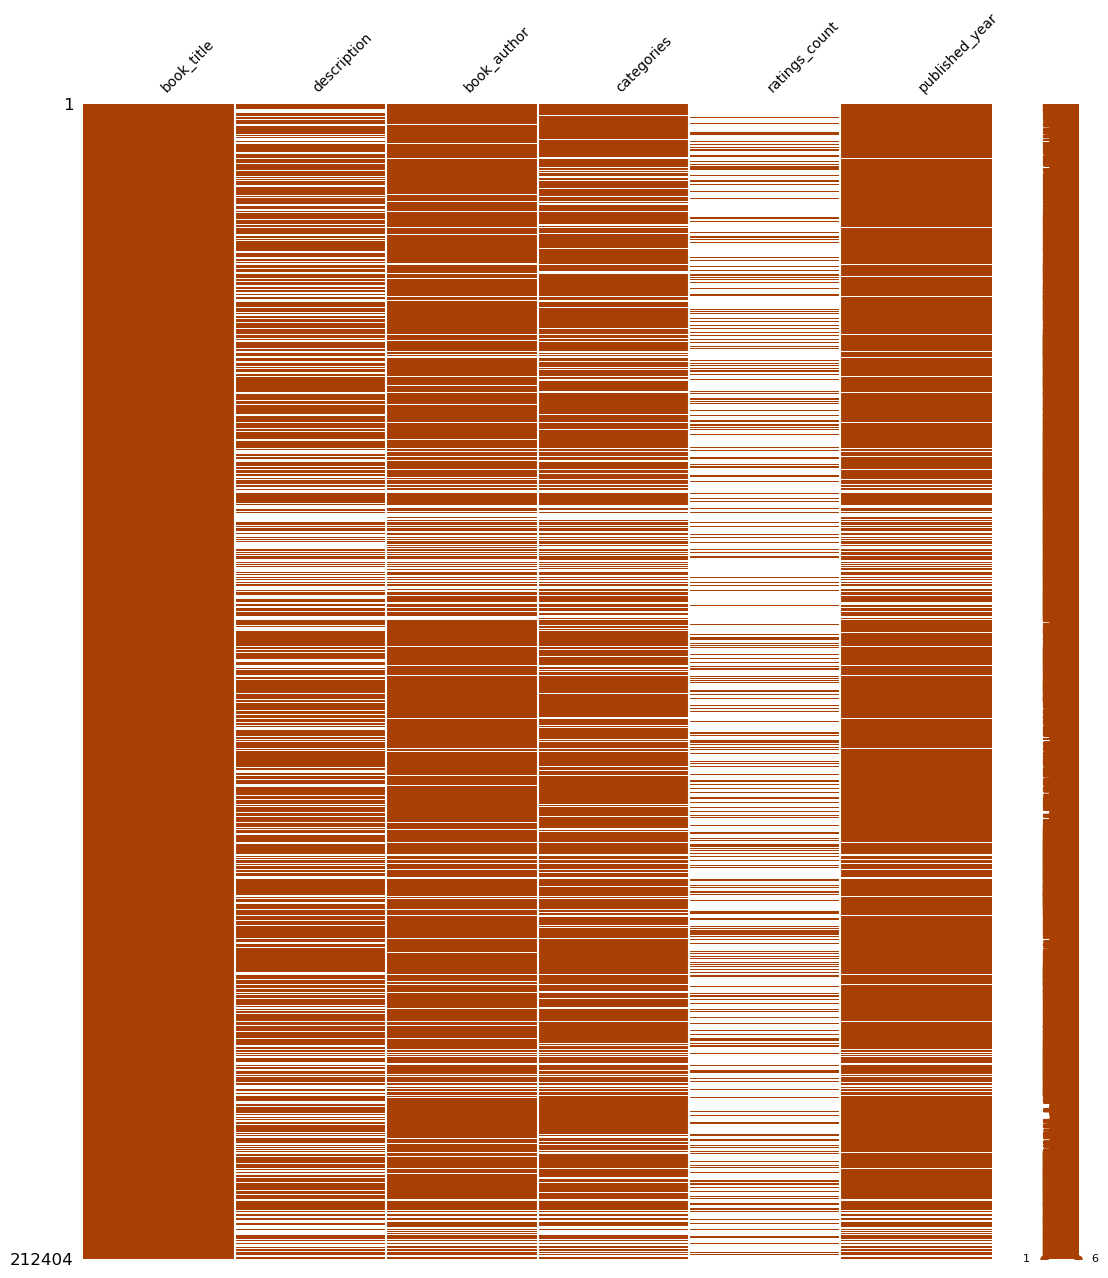

In [53]:
msn.matrix(info, color=(0.66, 0.25, 0.013), figsize=[13, 15], fontsize=10)

<Axes: >

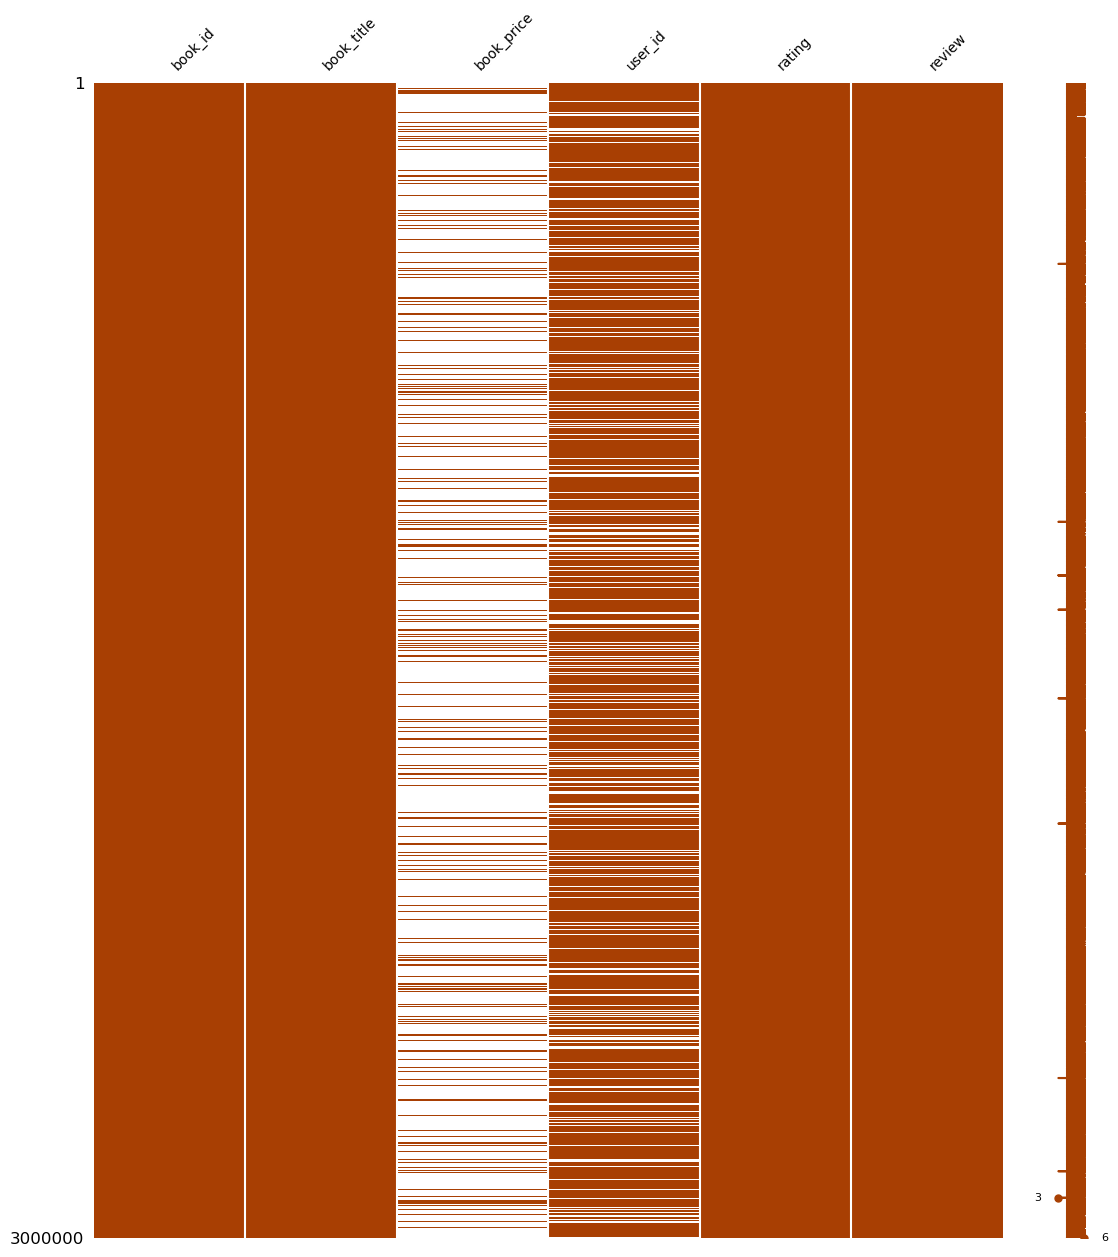

In [54]:
msn.matrix(ratings, color=(0.66, 0.25, 0.013), figsize=[13, 15], fontsize=10)

## *Distribution Plotting*

### *Pie-chart*

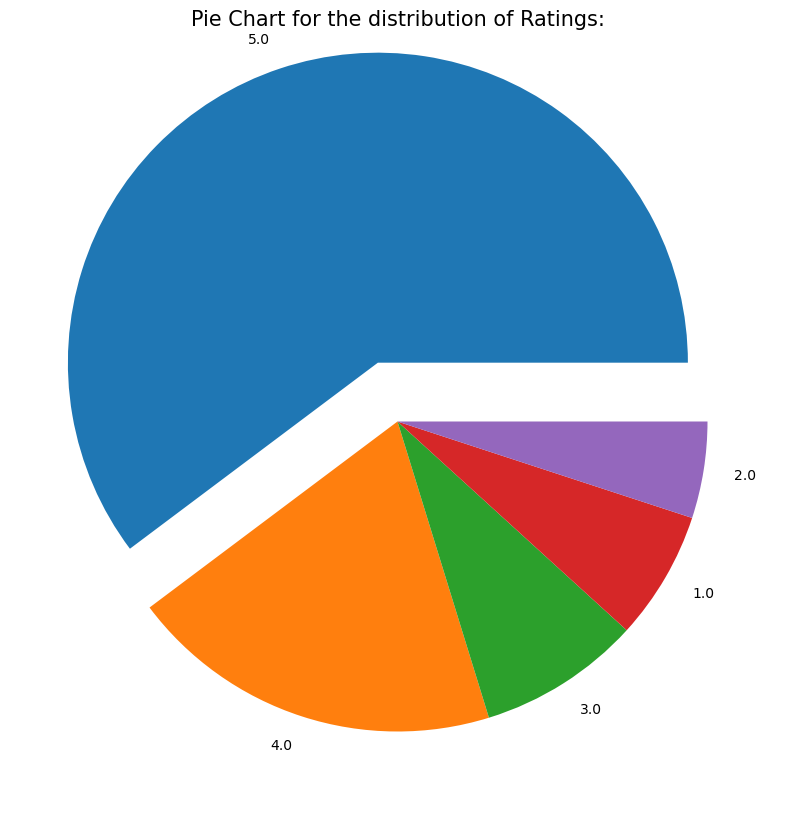

In [70]:
plt.figure(figsize=(10, 12))
color_scheme = ['orange', 'mediumturquoise', 'maroon']
labels = ratings['rating'].value_counts().keys().map(str)
values = ratings['rating'].value_counts() / ratings['rating'].value_counts().shape[0]
explode = [0.2, 0, 0, 0, 0]

plt.pie(values, labels = labels, explode = explode)
plt.title('Pie Chart for the distribution of Ratings:', fontsize = 15)
plt.show()

### *Histogram*

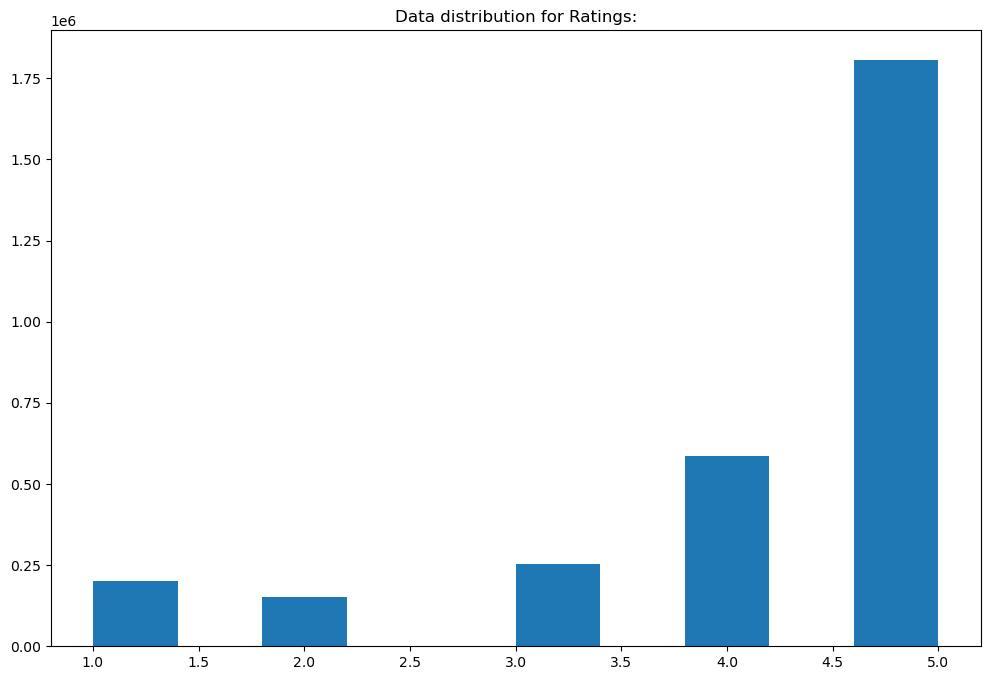

In [71]:
plt.figure(figsize=(12, 8))
plt.hist(ratings['rating'])
plt.title('Data distribution for Ratings:')
plt.show()

## *Distribution of Genre of books*

In [72]:
genres = info['categories'].value_counts().sort_values(ascending=False)

In [74]:
genres = genres.head(10)
genres

['Fiction']                      23419
['Religion']                      9459
['History']                       9330
['Juvenile Fiction']              6643
['Biography & Autobiography']     6324
['Business & Economics']          5625
['Computers']                     4312
['Social Science']                3834
['Juvenile Nonfiction']           3446
['Science']                       2623
Name: categories, dtype: int64

### *Horizontal Bar plot*

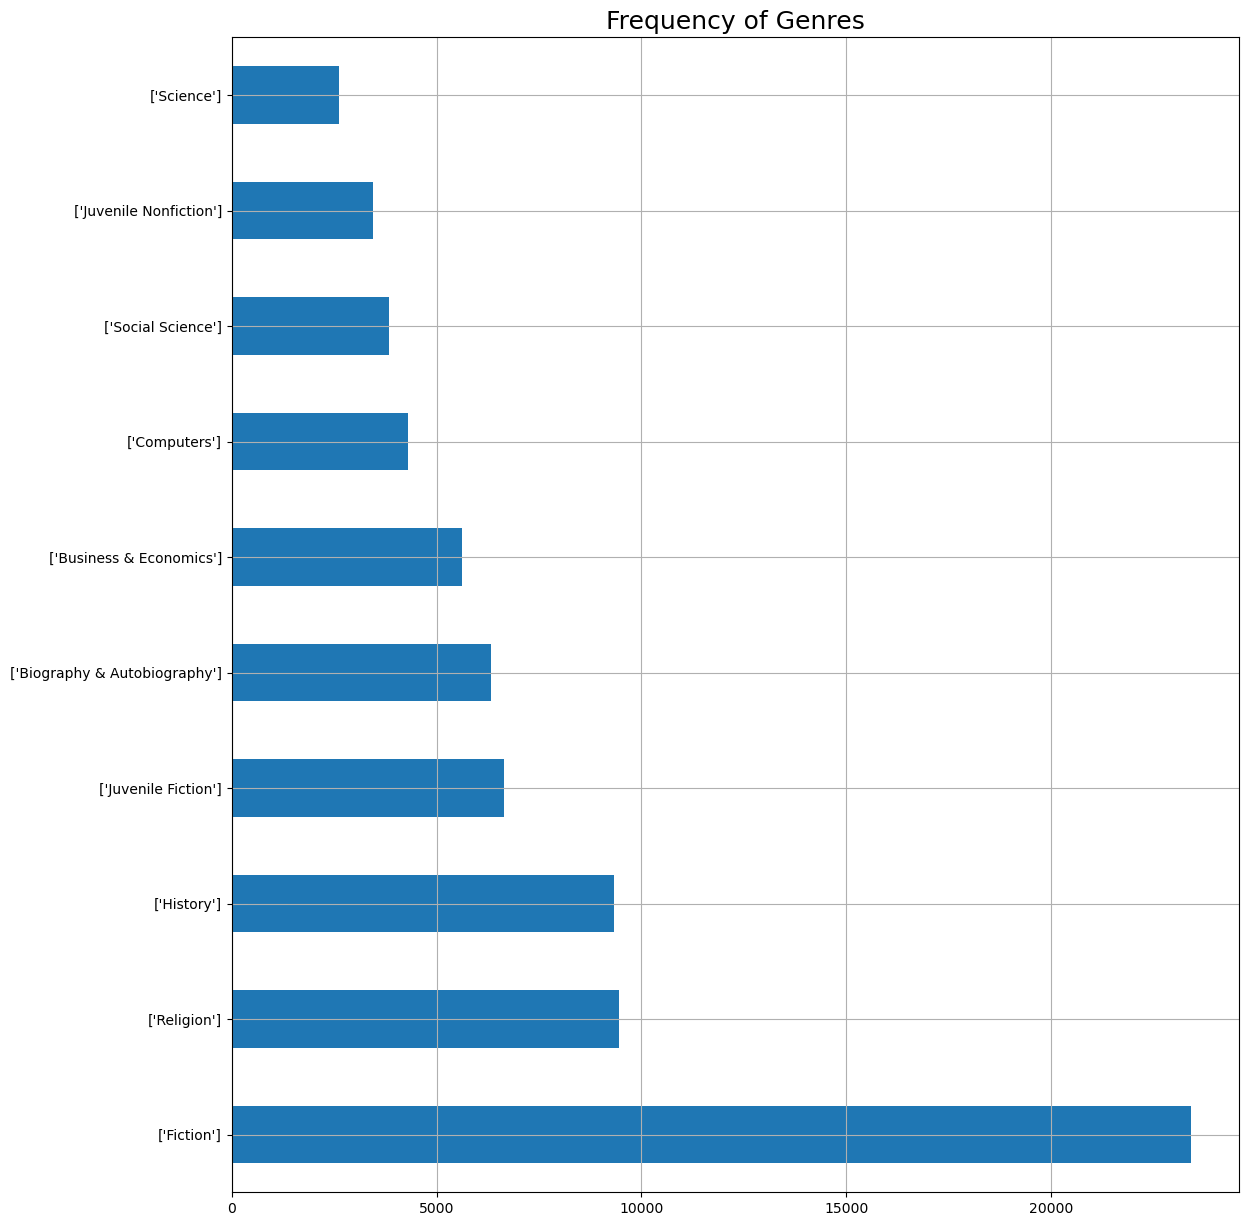

In [75]:
genres.plot(kind='barh', figsize=(13, 15))
plt.title('Frequency of Genres', fontsize=18)
plt.grid()
plt.show()

### *Pie Chart*

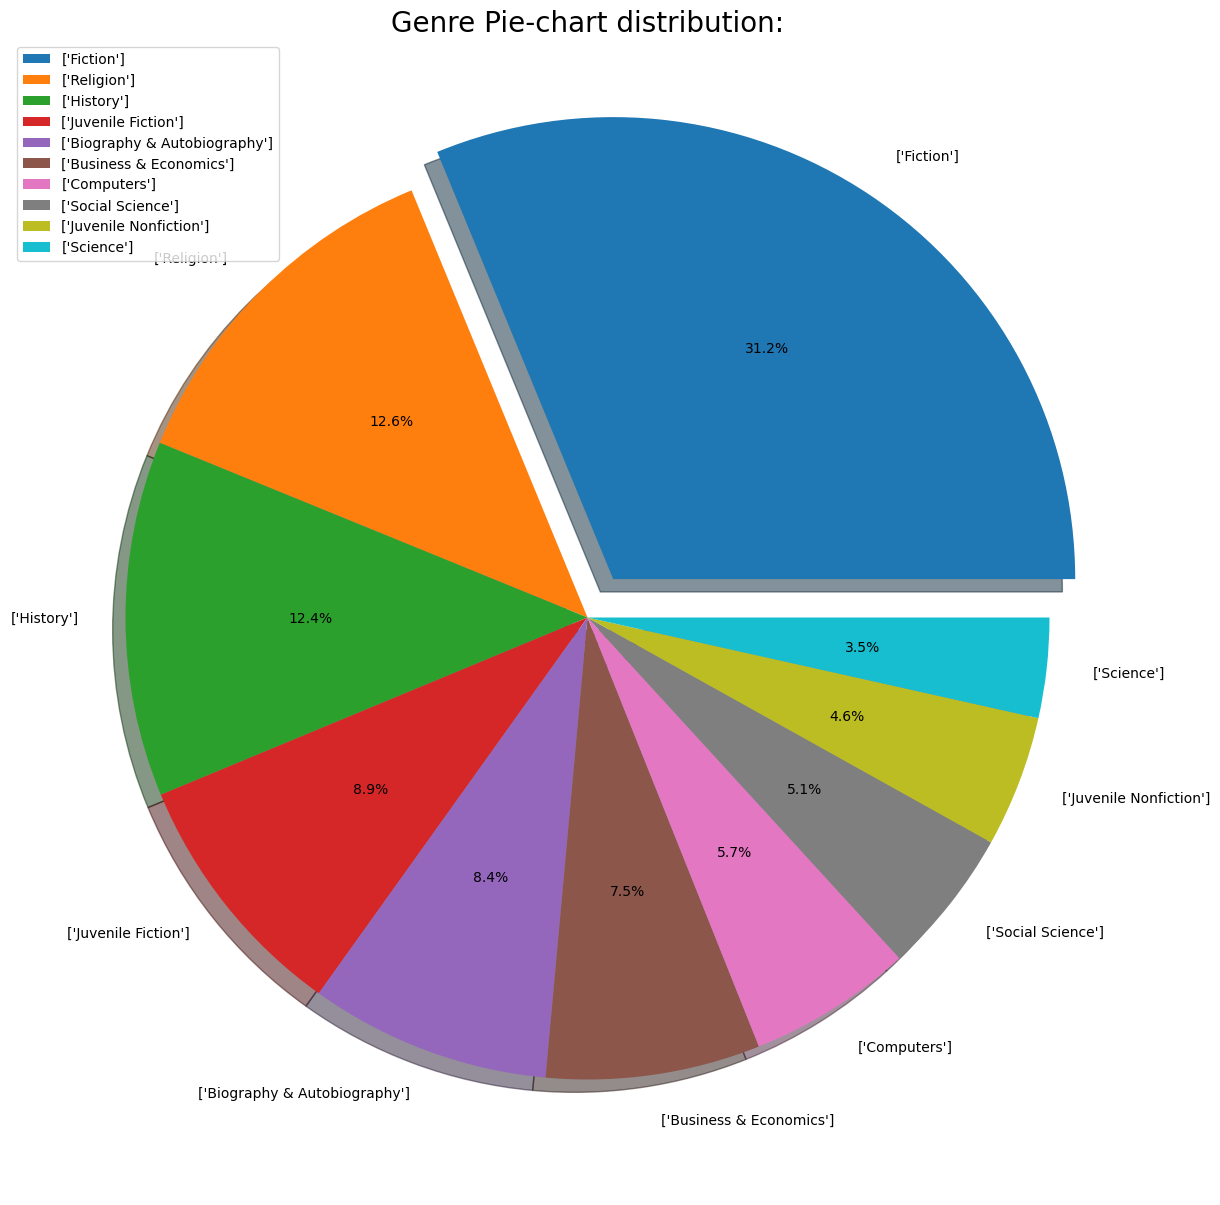

In [77]:
plt.figure(figsize=(15, 15))
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
labels = genres.keys().map(str)
title = 'Genre Pie-chart distribution:'

plt.pie(genres, explode=explode, labels=labels,
        autopct='%1.1f%%', shadow=True)
plt.title(title, fontsize=20)
plt.axis('off')
plt.legend(loc="upper left")
plt.show()

# 3. Data Mining

## *Establish feature patterns and relationships*

### *Books most accessed or bought by users*

In [81]:
most_purchases = ratings.groupby('book_title')['user_id'].count().sort_values()

most_purchases

book_title
you can do anything with crepes                                           0
Apache gold: A story of the strange Southwest                             0
Drunkard                                                                  0
Pointz Hall: The earlier and later typescripts of Between the acts        0
Nationalism in colonial Africa                                            0
                                                                      ...  
Great Expectations                                                     5675
Wuthering Heights                                                      8660
Atlas Shrugged                                                        10762
Pride and Prejudice                                                   17969
The Hobbit                                                            18237
Name: user_id, Length: 212403, dtype: int64

In [82]:
df_ratings = most_purchases.to_frame()
df_ratings['most_purchases'] = most_purchases

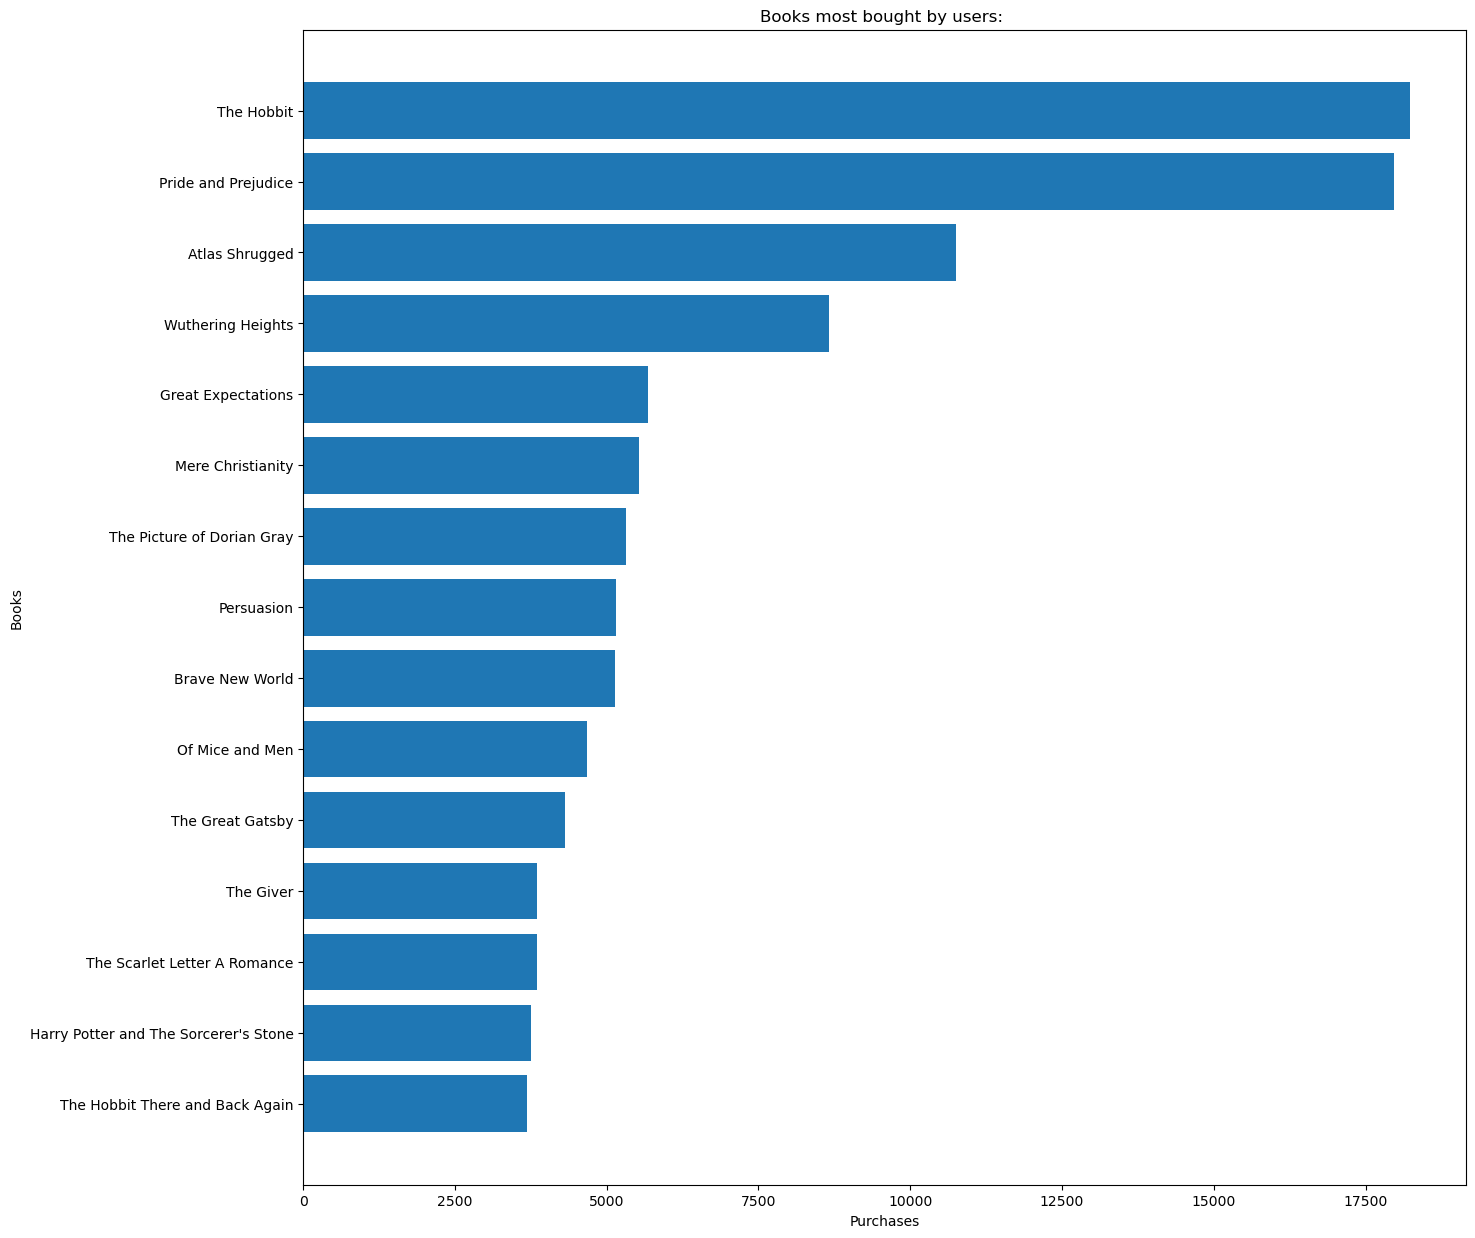

In [84]:
plt.figure(figsize=(15, 15))
plt.barh(most_purchases.index[-15:], most_purchases.values[-15:])

plt.title("Books most bought by users: ")
plt.xlabel('Purchases')
plt.ylabel('Books')
plt.show()

### *Highest rated books*

In [85]:
mean_ratings = ratings.groupby('book_title')['rating'].mean()

mean_ratings

book_title
" Film technique, " and, " Film acting "                                                                                                   4.500000
" We'll Always Have Paris": The Definitive Guide to Great Lines from the Movies                                                            5.000000
"... And Poetry is Born ..." Russian Classical Poetry                                                                                      4.000000
"A Titanic hero" Thomas Andrews, shipbuilder                                                                                               4.875000
"A Truthful Impression of the Country": British and American Travel Writing in China, 1880-1949                                            4.000000
                                                                                                                                             ...   
with an everlasting love                                                                             

In [122]:
df_ratings['mean_ratings'] = mean_ratings

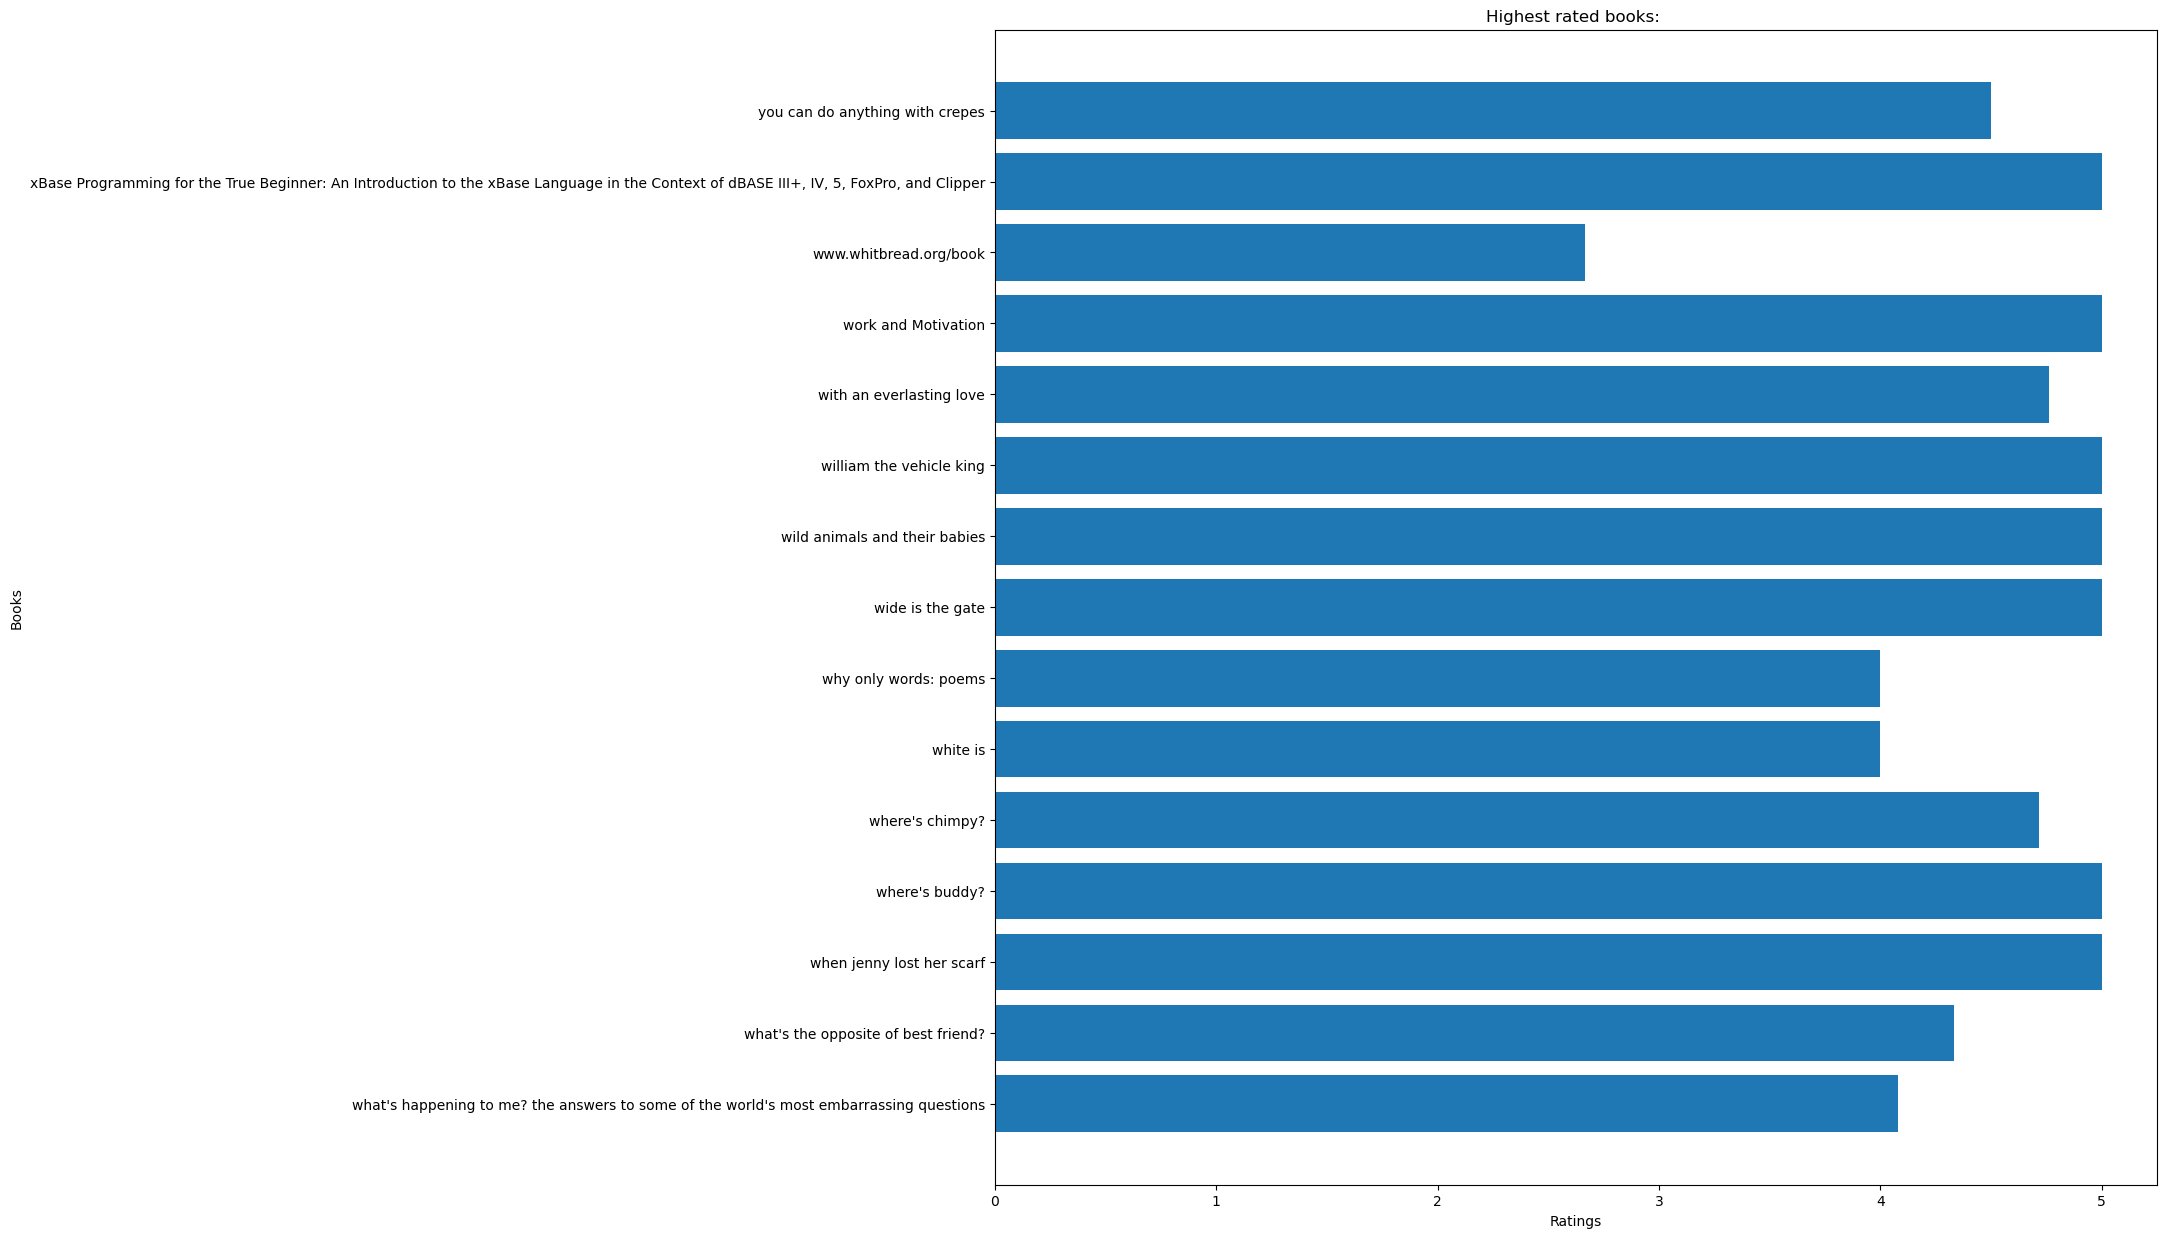

In [89]:
plt.figure(figsize=(15, 15))
plt.barh(mean_ratings.index[-15:], mean_ratings.values[-15:])

plt.title("Highest rated books: ")
plt.xlabel('Ratings')
plt.ylabel('Books')
plt.show()

### *Books with the highest mean price in stores*

In [90]:
mean_price = ratings.groupby('book_title')['book_price'].mean()

mean_price

book_title
" Film technique, " and, " Film acting "                                                                                                     NaN
" We'll Always Have Paris": The Definitive Guide to Great Lines from the Movies                                                              NaN
"... And Poetry is Born ..." Russian Classical Poetry                                                                                        NaN
"A Titanic hero" Thomas Andrews, shipbuilder                                                                                                 NaN
"A Truthful Impression of the Country": British and American Travel Writing in China, 1880-1949                                            70.27
                                                                                                                                           ...  
with an everlasting love                                                                                               

In [92]:
df_ratings['mean_price'] = mean_price

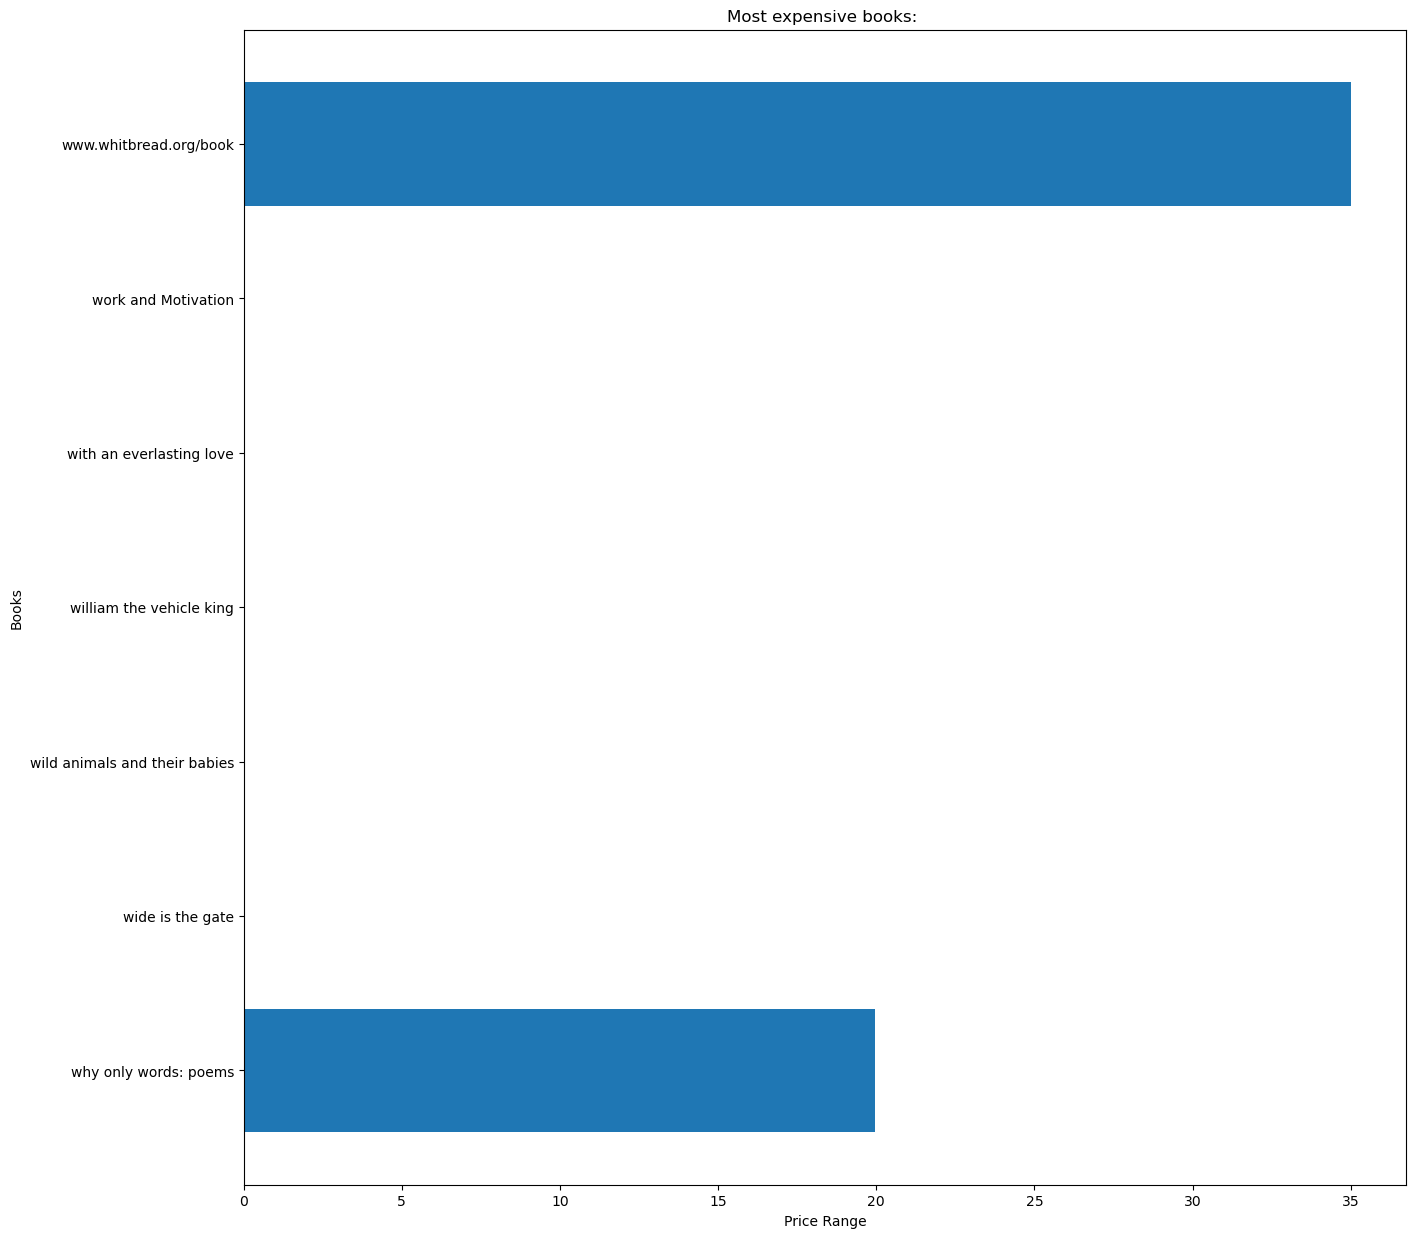

In [93]:
plt.figure(figsize=(15, 15))
plt.barh(mean_price.index[-15:], mean_price.values[-15:])

plt.title("Most expensive books: ")
plt.xlabel("Price Range")
plt.ylabel('Books')
plt.show()

### *Top-rated books accumulating over 3500 ratings per book*

In [95]:
books_rated = info[info['ratings_count'] > 3500][['book_title', 'ratings_count']].drop_duplicates()

books_rated

,book_title,ratings_count
10176,On Fire.,3802.0
12277,The Watchmen,3907.0
16499,The cat in the hat,3638.0
22370,Zen and the Art of Motorcycle Maintenance,3618.0
25239,The Habit of Living,3863.0
26834,The Alchemist,4895.0
28711,A History of the United States,3907.0
31260,Henrietta,4067.0
33680,Red Tent,3656.0
38618,Me Talk Pretty One Day,3638.0


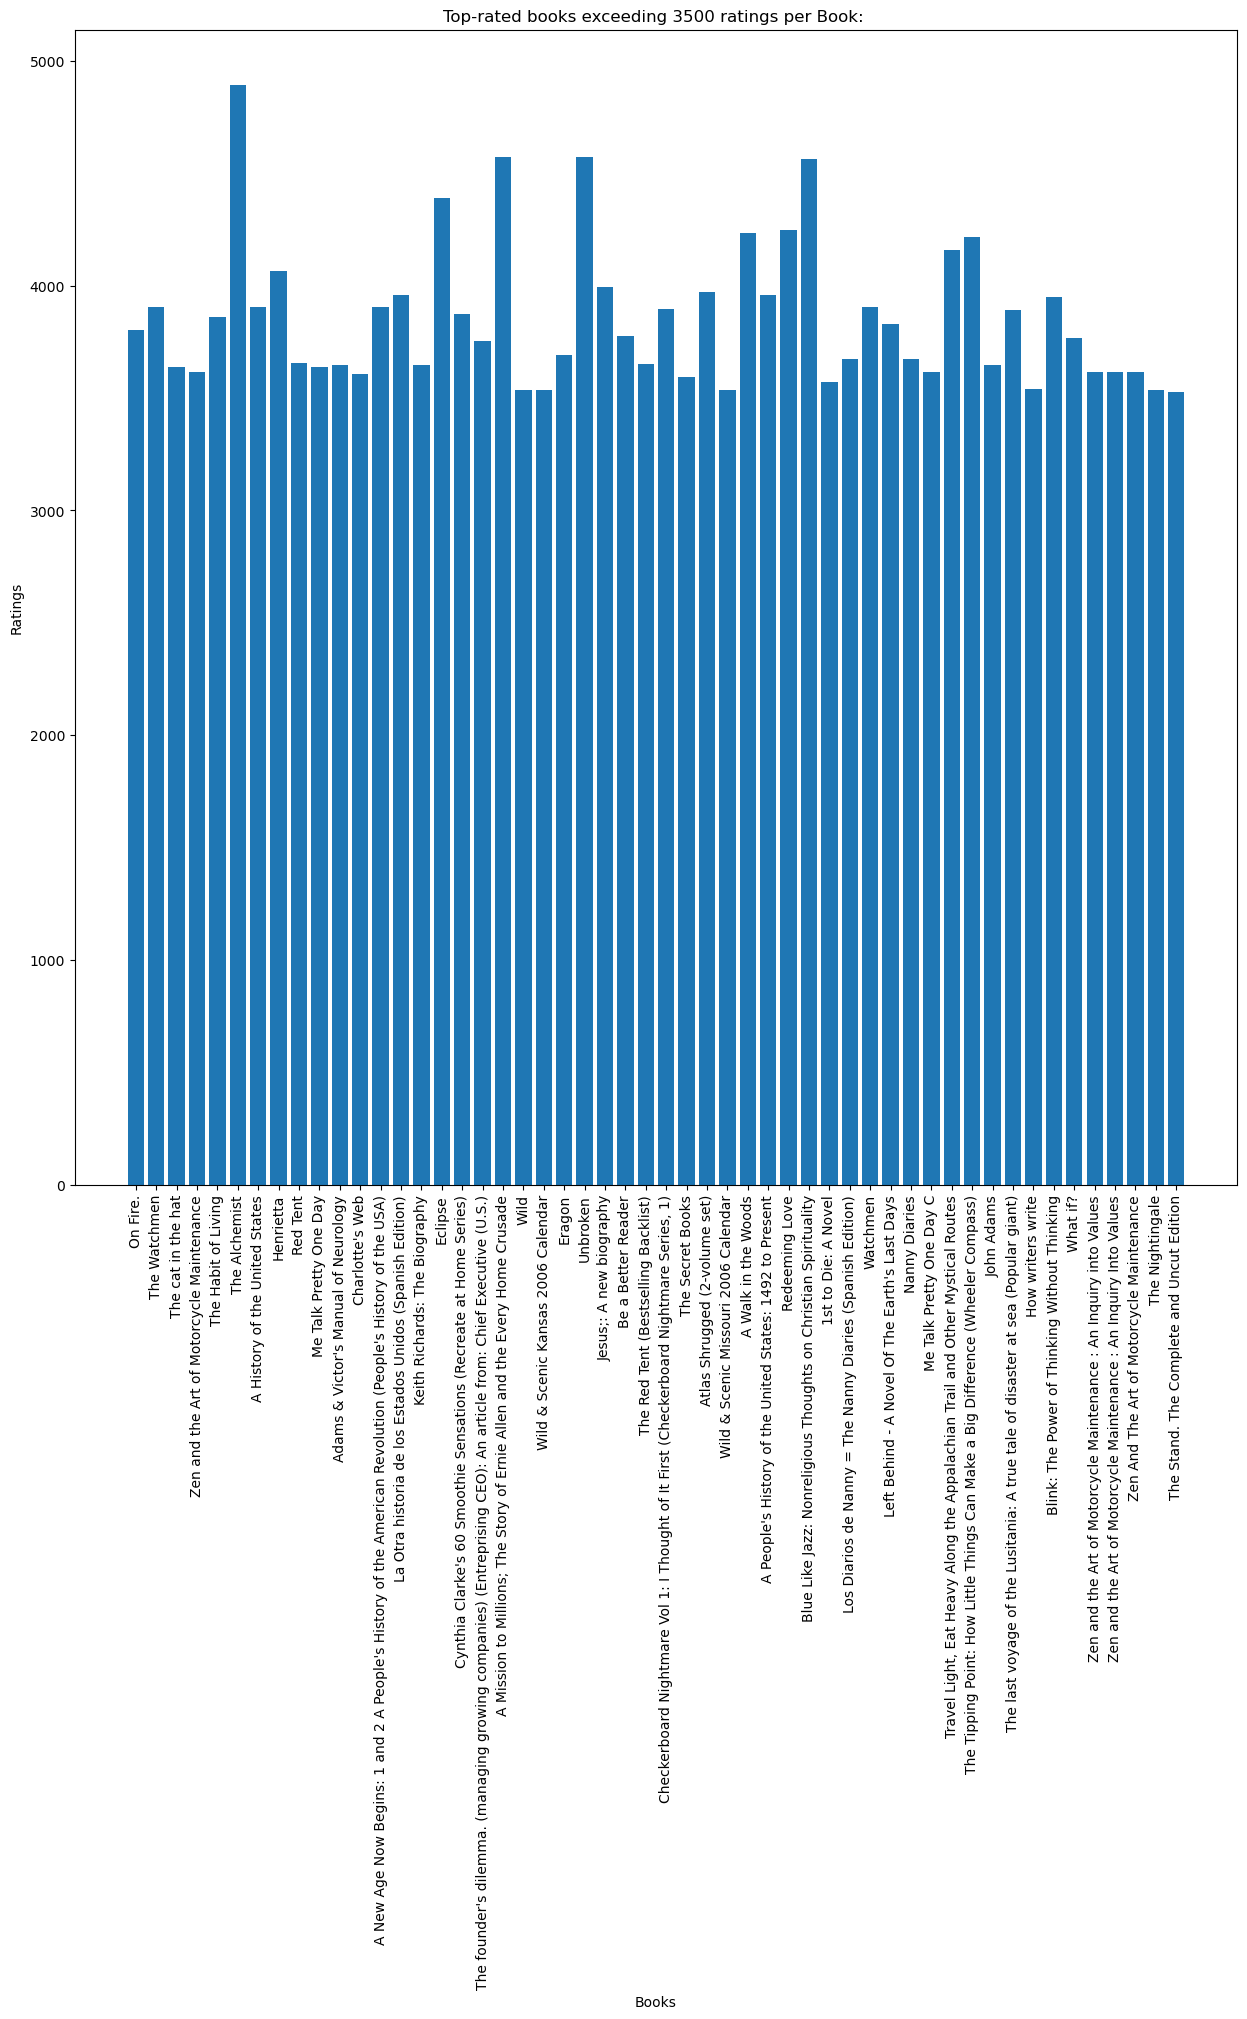

In [98]:
plt.figure(figsize=(15, 15))
plt.bar(books_rated['book_title'], books_rated['ratings_count'])

plt.title("Top-rated books exceeding 3500 ratings per Book: ")
plt.xlabel('Books')
plt.xticks(rotation='vertical')
plt.ylabel('Ratings')
plt.show()

### *The amount of books in a particular category*

In [99]:
categories_title = info.groupby('categories')['book_title'].count().sort_values()

categories_title

categories
["'Abd al-Bah̄a, 1844-1921"]          1
['Homeopathic pharmacy']              1
['Homeopathic pharmacopoeias']        1
['Home']                              1
['Home missions']                     1
                                  ...  
['Biography & Autobiography']      6324
['Juvenile Fiction']               6643
['History']                        9330
['Religion']                       9459
['Fiction']                       23419
Name: book_title, Length: 10883, dtype: int64

In [100]:
df_records = categories_title.to_frame()

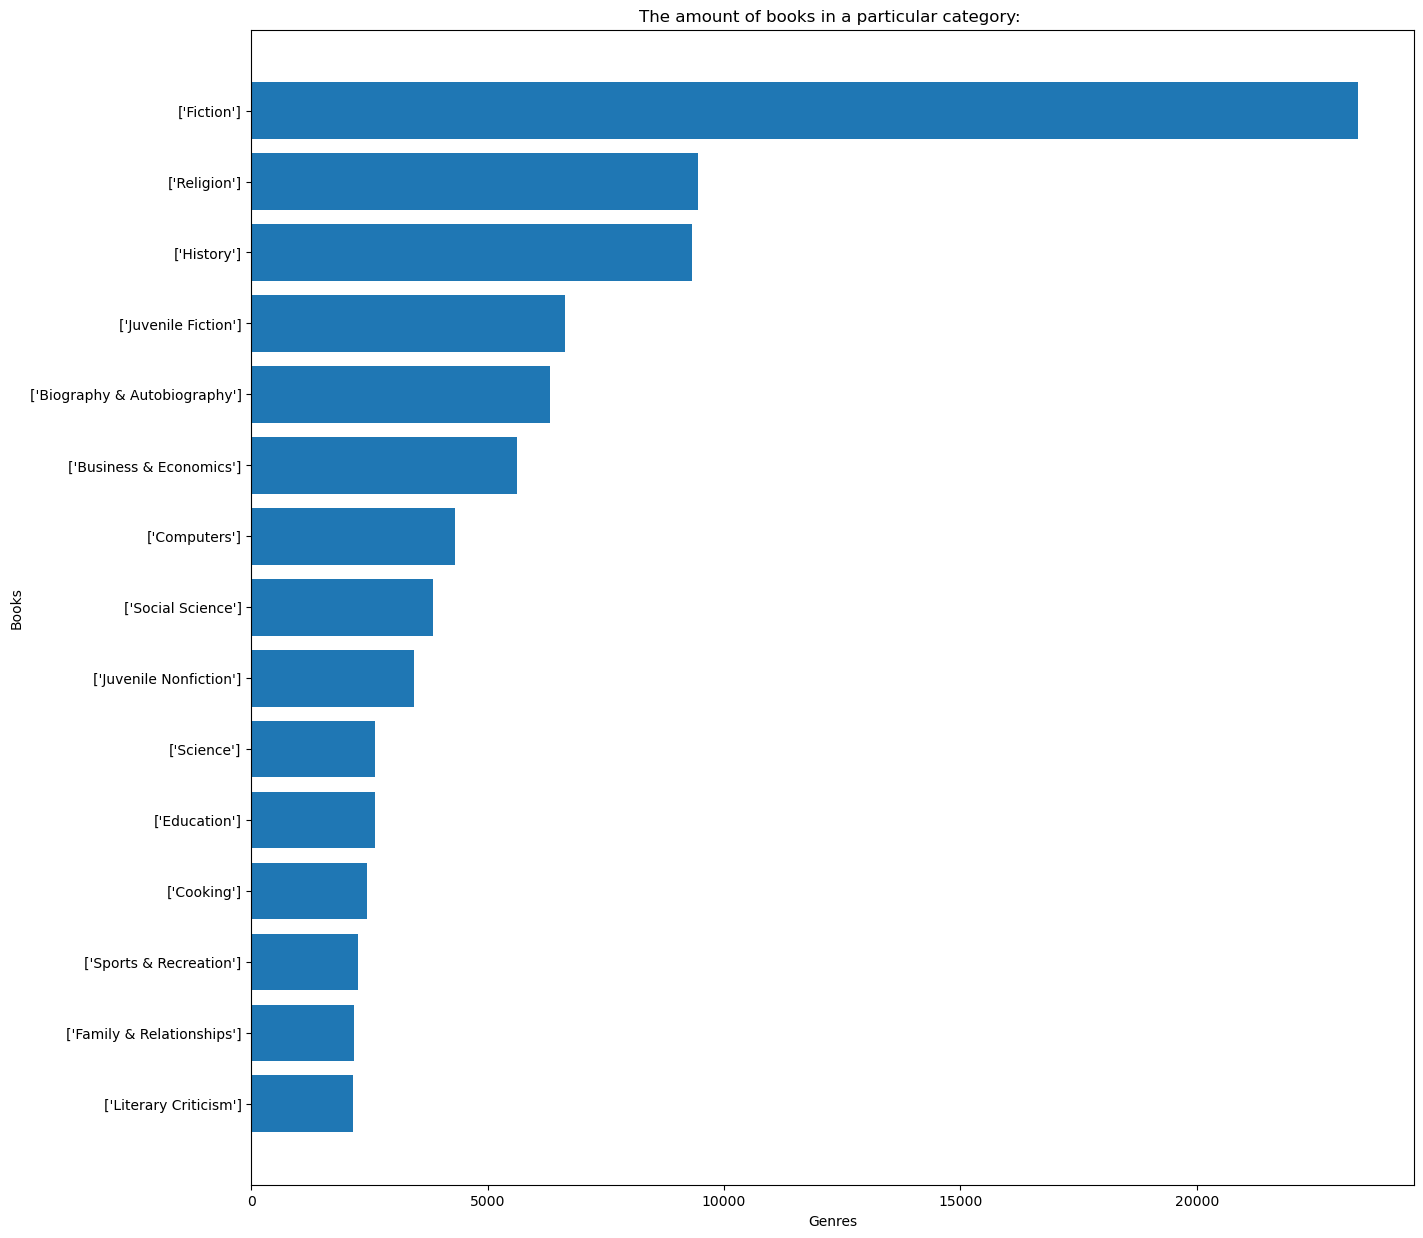

In [101]:
plt.figure(figsize=(15, 15))
plt.barh(categories_title.index[-15:], categories_title.values[-15:])

plt.title("The amount of books in a particular category: ")
plt.xlabel('Genres')
plt.ylabel('Books')
plt.show()

### *Authors with the most published books*

In [103]:
author_publish = info.groupby('book_author')['book_title'].count().sort_values()

author_publish

book_author
['Maharshi Ramana']                                            0
["'Abd al-Samih Abu 'Umar"]                                    1
['Martha Seif Simpson', 'Lynne Perrigo']                       1
['Martha Sears', 'William Sears', 'Christie Watts Kelly']      1
['Martha Schueneman']                                          1
                                                            ... 
['Erle Stanley Gardner']                                     124
['Agatha Christie']                                          142
['Library of Congress. Copyright Office']                    178
['William Shakespeare']                                      191
['Rose Arny']                                                236
Name: book_title, Length: 127278, dtype: int64

In [104]:
df_records['author_publish'] = author_publish

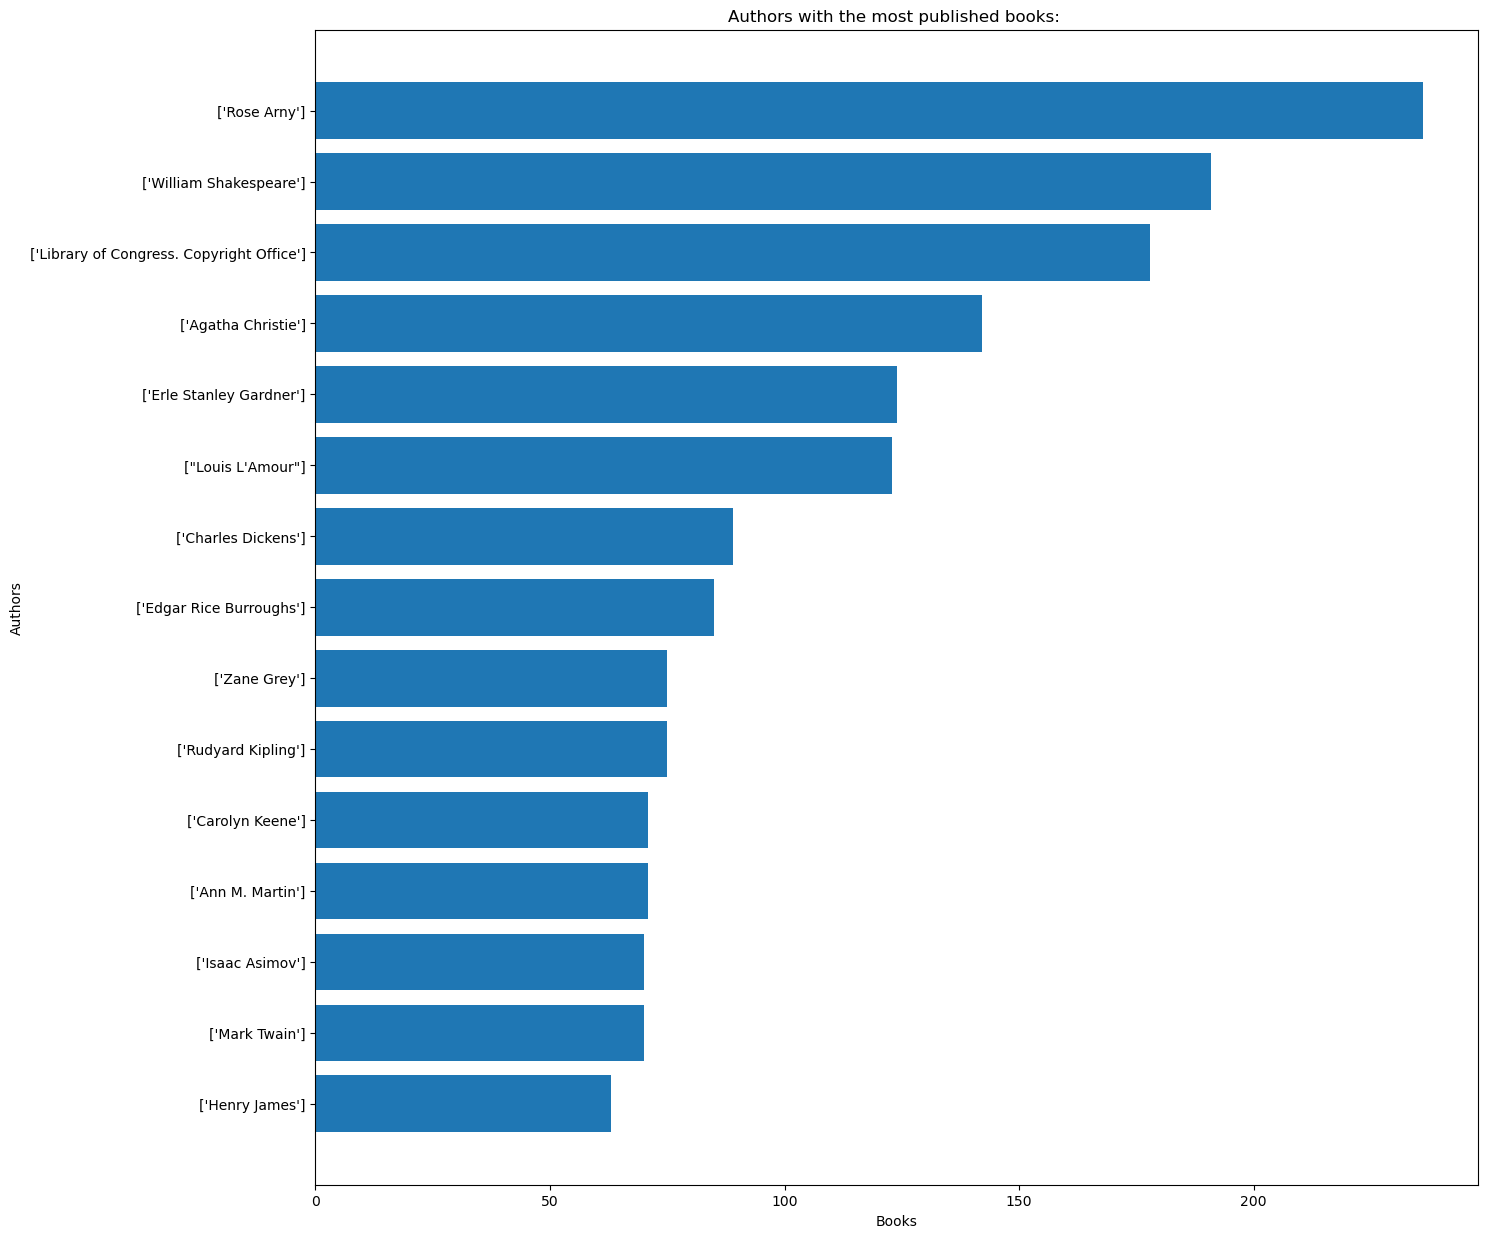

In [105]:
plt.figure(figsize=(15, 15))
plt.barh(author_publish.index[-15:], author_publish.values[-15:])

plt.title("Authors with the most published books: ")
plt.xlabel('Books')
plt.ylabel('Authors')
plt.show()

### *Authors who worked in a variety genres of book genres*

In [106]:
author_categories = info.groupby('book_author')['categories'].nunique()   

author_categories

book_author
["'Abd al-Samih Abu 'Umar"]                                                           0
["'Annah Sobelman"]                                                                   1
["'Jig rten mgon po (('Bri gung chos rje ;)", 'Khenpo Rinpochay Könchok Gyaltsen']    1
["A'isha Ajayi"]                                                                      1
["A. H. Gebhard-L'Estrange"]                                                          1
                                                                                     ..
['생명의말씀사편집부']                                                                         1
['알렉상드르 뒤마(Alexandre Dumas)']                                                         1
['임병균외']                                                                              0
['편집부']                                                                               1
['편집부편']                                                                              1
Name: categories, Le

In [111]:
df_records['book_genres'] = author_categories

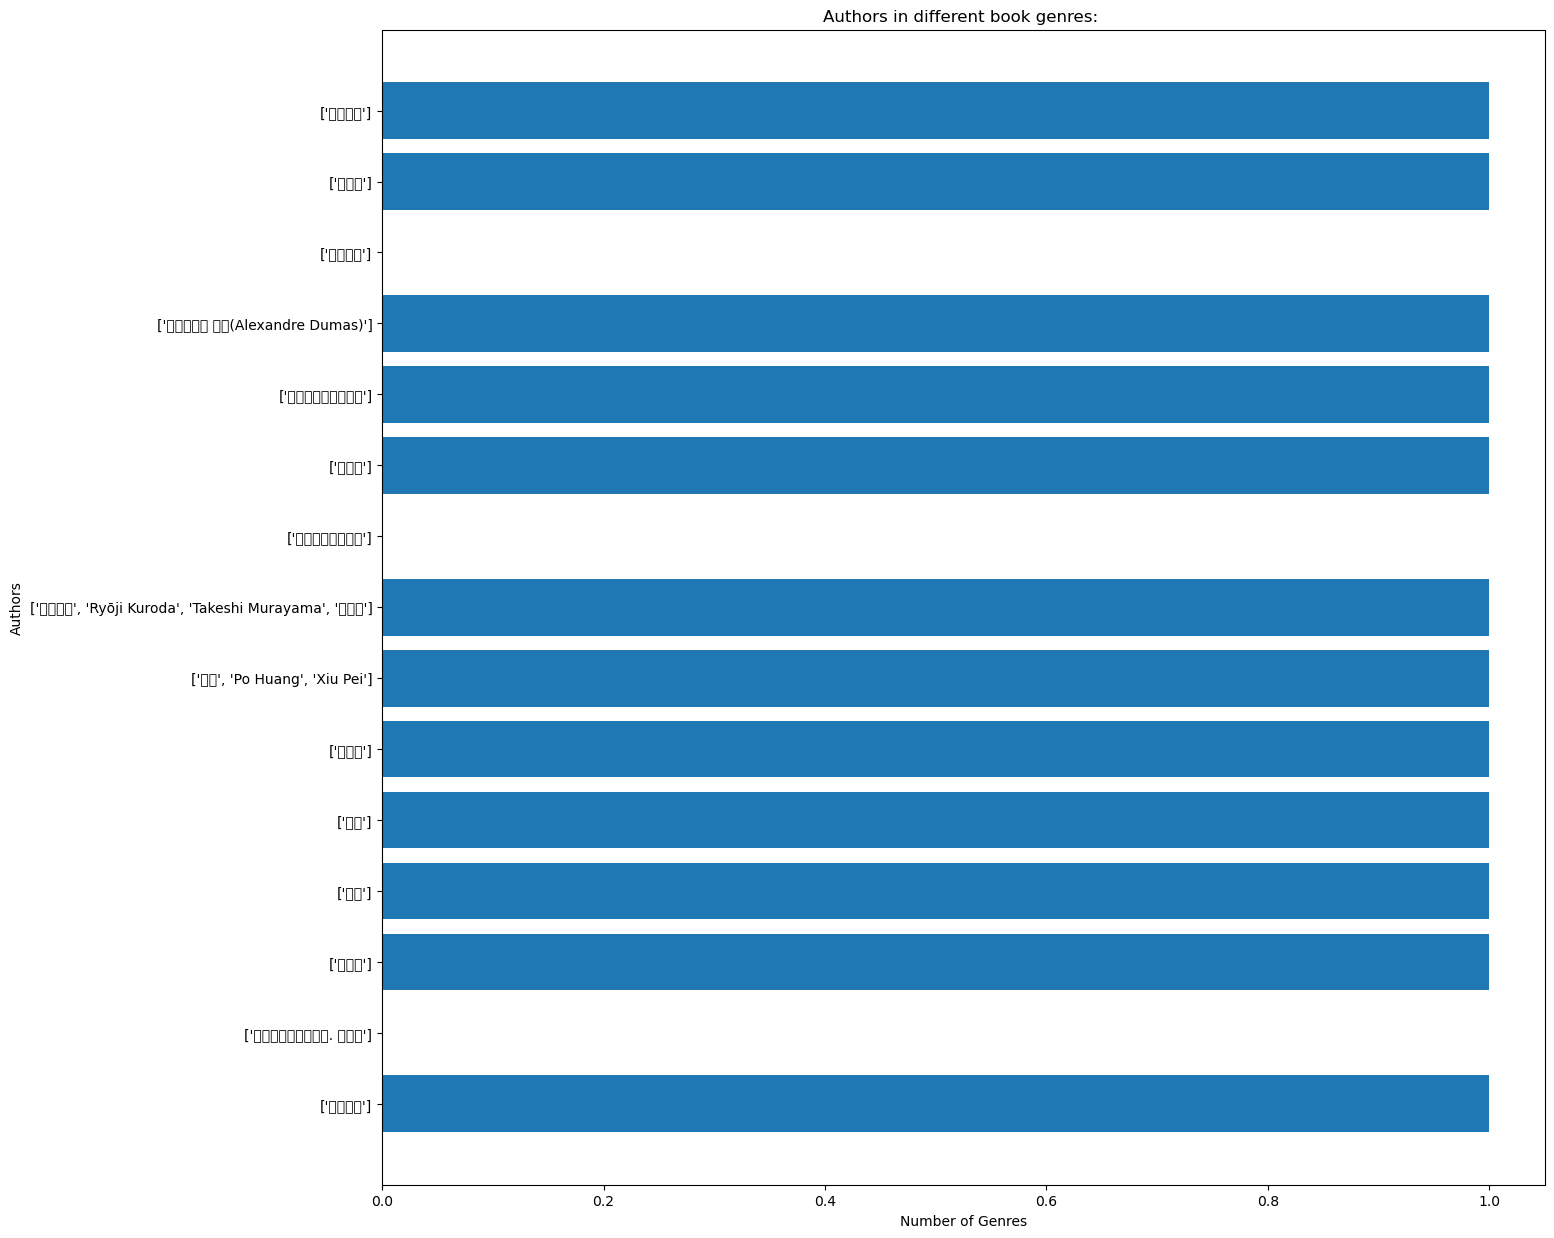

In [112]:
plt.figure(figsize=(15, 15))
plt.barh(author_categories.index[-15:], author_categories.values[-15:])

plt.title("Authors in different book genres: ")
plt.xlabel("Number of Genres")
plt.ylabel('Authors')
plt.show()

### *Number of years an author is active*

In [113]:
author_years = info.groupby('book_author')['published_year'].nunique()       

author_years

book_author
["'Abd al-Samih Abu 'Umar"]                                                           1
["'Annah Sobelman"]                                                                   1
["'Jig rten mgon po (('Bri gung chos rje ;)", 'Khenpo Rinpochay Könchok Gyaltsen']    1
["A'isha Ajayi"]                                                                      1
["A. H. Gebhard-L'Estrange"]                                                          1
                                                                                     ..
['생명의말씀사편집부']                                                                         1
['알렉상드르 뒤마(Alexandre Dumas)']                                                         1
['임병균외']                                                                              1
['편집부']                                                                               3
['편집부편']                                                                              1
Name: published_year

In [116]:
df_records['author_year'] = author_years

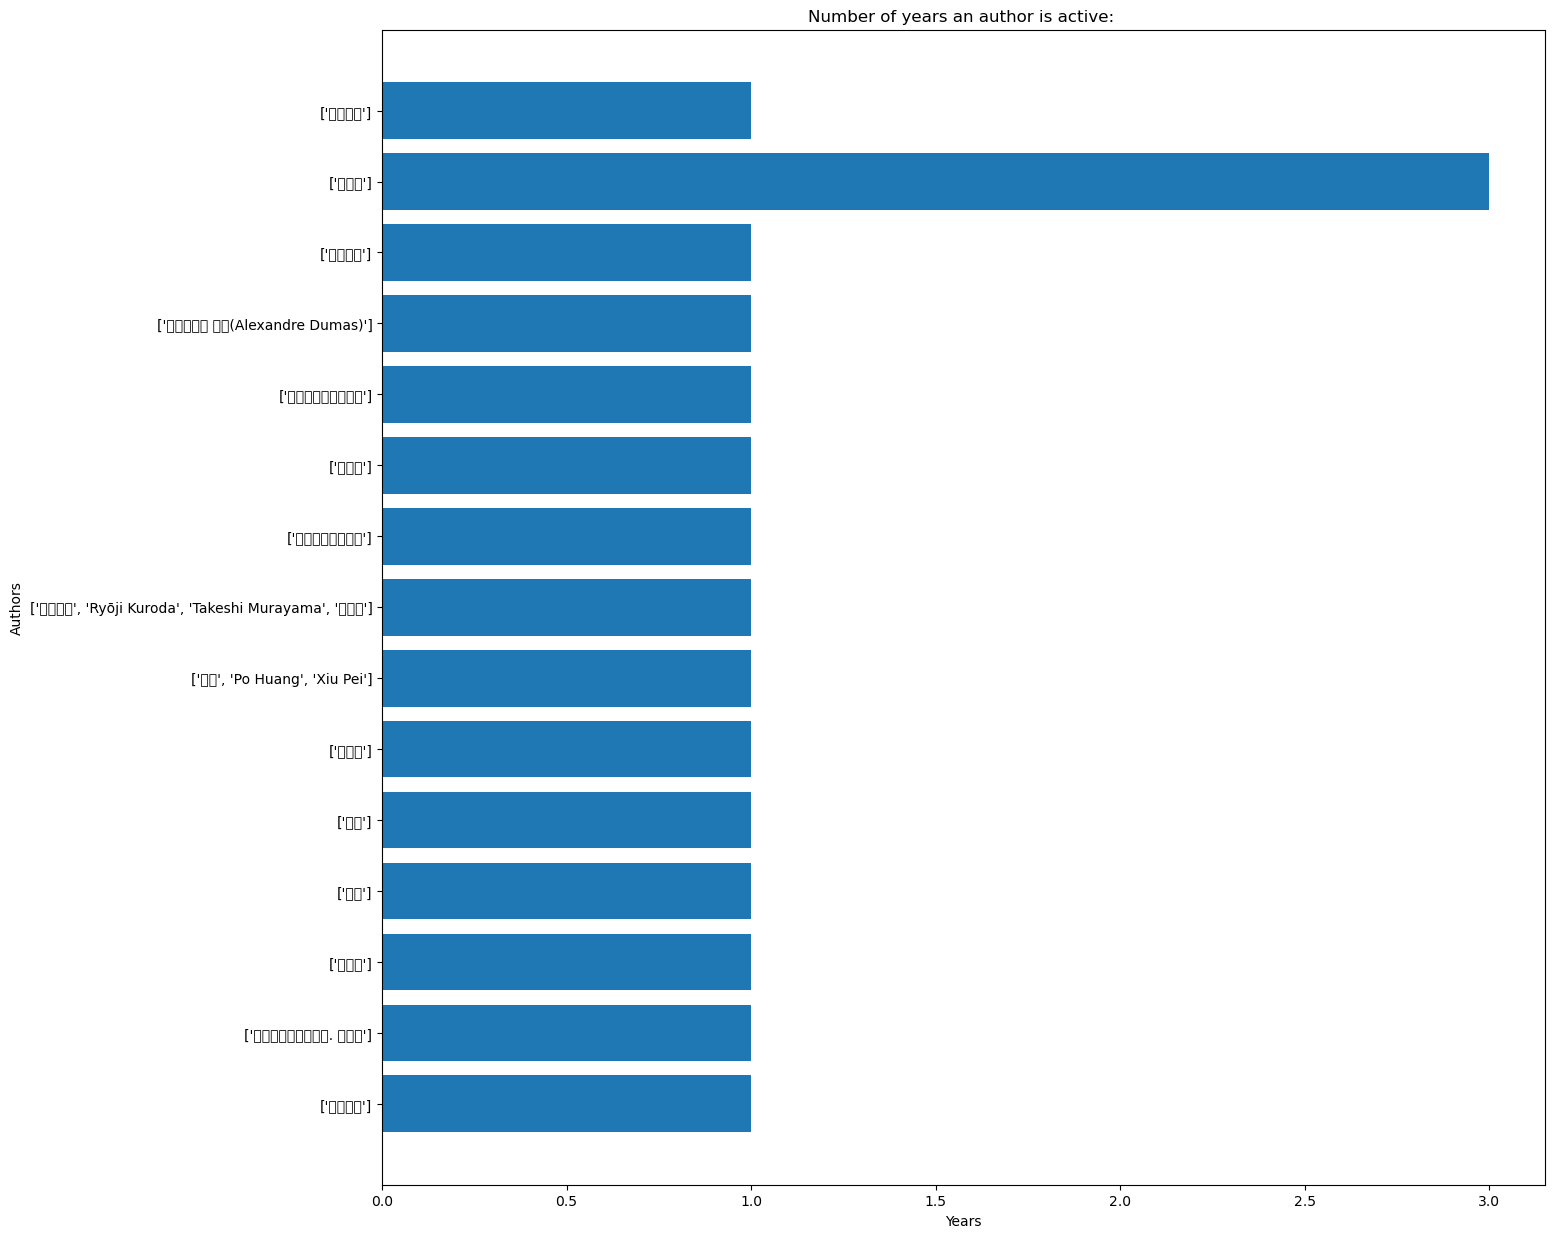

In [117]:
plt.figure(figsize=(15, 15))
plt.barh(author_years.index[-15:], author_years.values[-15:])

plt.title("Number of years an author is active: ")
plt.xlabel('Years')
plt.ylabel('Authors')
plt.show()

## *Dataframe Sorting*

In [118]:
df_records = df_records.sort_values(by=['author_publish', 'book_genres'], ascending=False)

df_records.head(25)

,book_title,author_publish,book_genres,author_year
categories,,,,
['Dante Alighieri'],2,21.0,7.0,18.0
['Aristophanes'],1,11.0,6.0,9.0
['Catholic Church'],5,10.0,2.0,8.0
['Aesop'],1,6.0,4.0,5.0
['United States'],387,4.0,4.0,4.0
['Obi'],1,3.0,1.0,2.0
['Texas'],19,2.0,2.0,2.0
['Canada'],82,2.0,2.0,2.0
['Jamaica'],1,1.0,1.0,1.0


In [123]:
df_ratings = df_ratings.sort_values(by=['most_purchases', 'mean_ratings', 'mean_price'], ascending=False)

df_ratings.head(25)

,user_id,most_purchases,mean_price,mean_ratings
book_title,,,,
"Advances in Chemical Physics, Volume 119: Modern Nonlinear Optics, Parts 1-3, 2nd Edition",2,5.0,890.00,5.0
Chicago School Pragmatism (History of American Thought),1,5.0,840.00,5.0
Encyclopedia of Phenomenology (Contributions to Phenomenology),2,5.0,809.99,5.0
Encyclopedia of Bioethics (5 Volume Set),1,5.0,807.30,5.0
"Encyclopedia of Stress, Three-Volume Set",2,5.0,800.00,5.0
"Standard Warehouse Management System Search Bundle, WMS",1,5.0,795.00,5.0
Encyclopedia of Contemporary Latin American and Caribbean Cultures (Encyclopedias of Contemporary Culture)(3 Volume Set),1,5.0,785.00,5.0
Companion Encyclopedia of the History and Philosophy of the Mathematical Sciences (Routledge Reference) (Vol 1 & 2),1,5.0,716.63,5.0
"Computer-Konkordanz Zum Novum Testamentum Graece Von Nestle-Aland, 26. Auflage Und Zum Greek New Testament, 3d Ed (1963p)",1,5.0,687.00,5.0


# 4.Text Processing and Sentiment Analysis

## *Entity-based processing*

### *Locate entities from description of the book to refine the searching engine optimization algorithm*

In [124]:
description = info['description'].head(100)

In [134]:
nlp = spacy.load("en_core_web_sm")

In [135]:
for text_block in description:
    print('\n• Text Block:\n', text_block)
    doc = nlp(str(text_block))

    #  Find named entities, phrases and concepts
    print('\n• Entities present:')
    for entity in doc.ents:
        print('\n*', entity.text, entity.label_)


• Text Block:
 nan

• Entities present:

• Text Block:
 Philip Nel takes a fascinating look into the key aspects of Seuss's career - his poetry, politics, art, marketing, and place in the popular imagination." "Nel argues convincingly that Dr. Seuss is one of the most influential poets in America. His nonsense verse, like that of Lewis Carroll and Edward Lear, has changed language itself, giving us new words like "nerd." And Seuss's famously loopy artistic style - what Nel terms an "energetic cartoon surrealism" - has been equally important, inspiring artists like filmmaker Tim Burton and illustrator Lane Smith. --from back cover

• Entities present:

* Philip Nel PERSON

* Seuss PERSON

* Nel PERSON

* Seuss PERSON

* America GPE

* Lewis Carroll PERSON

* Edward Lear PERSON

* nerd PERSON

* Seuss PERSON

* Nel PERSON

* Tim Burton PERSON

* Lane Smith PERSON

• Text Block:
 This resource includes twelve principles in understanding small church worship, fifteen practices for plannin


• Entities present:

* America GPE

* Rochelle Gurstein's FAC

* The Repeal of Reticence WORK_OF_ART

* America GPE

* First Amendment LAW

* Margaret Sanger's PERSON

* Woolsey PERSON

* Ulysses ORG

* Gurstein PERSON

• Text Block:
 Like a time bomb ticking away, hypertension builds quietly, gradually, placing unbearable strain on the body until it explodes--in heart attack, stroke, kidney failure, arterial disease, even death. But the disease does not have to progress that way. Here, in the third volume of the highly acclaimed Preventive Medicine Program, Dr. Kenneth H. Cooper, one of the nations foremost experts in the field of preventive medicine, presents a medically sound, reassuringly simple program that help you lower you blood pressure--and keep it down, often without drugs. Overcoming Hypertension gives you: --The latest facts on how cholesterol, cigarette smoking, obesity, and stress affect coronary risk levels. --Your high blood pressure risk profile, with newly devised c


• Entities present:

* Twenty-five years ago DATE

* several hundred CARDINAL

* Tennessee GPE

* America GPE

* The Farm ORG

* 1,200 CARDINAL

* today DATE

* Farm ORG

• Text Block:
 nan

• Entities present:

• Text Block:
 The Bismarck is perhaps the most famous – and notorious – warship ever built. Completed in 1941, the 45,000-ton German battleship sank HMS Hood, the pride of the British Navy, during one of the most sensational encounters in naval history. Following the sinking, Bismarck was chased around the North Atlantic by many units of the Royal Navy. She was finally dispatched with gunfire and torpedoes on 27 May, less than five months after her completion. Her wreck still lies where she sank, 4,800m down and 960km off the west coast of France. Drawing on new research and technology, this edition is the most comprehensive examination of Bismarck ever published. It includes a complete set of detailed line drawings with fully descriptive keys and full-colour 3D artwork, supp


• Entities present:

* 16 CARDINAL

* Leo, Rose en Naomi ORG

* dan wordt PERSON

* Naomi PERSON

* 15 CARDINAL

• Text Block:
 Mysterieus, duister en passioneel Londen, 19de eeuw. Dr. Francis Whitman, ooit een gevierd chemicus, wordt door een journalist gevraagd om een seance bij te wonen van het lokale fenomeen Elizabeth Archer. Zijn opdracht is om op wetenschappelijke wijze aan te tonen dat dit spirituele medium een oplichtster is. Het feit dat Miss Archer nooit in één ruimte te zien is met de geest die ze oproept en dat ze als twee druppels water op elkaar lijken, maakt het werk van Dr. Whitman aanvankelijk eenvoudig. Maar niets is wat het lijkt, vooral wanneer er een dodelijk slachtoffer valt... Seance is een duistere, historische thriller waarin passie, gruwel en spanning naadloos in elkaar worden verweven; een spannende roman in de Angelsaksische traditie.

• Entities present:

* Londen GPE

* 19de ORDINAL

* Francis Whitman PERSON

* ooit GPE

* gevierd PERSON

* Elizabeth Arc


• Entities present:

* more than 1,000 CARDINAL

* Foreignisms PERSON

* one CARDINAL

• Text Block:
 Imagine... No More Arguing. Imagine... No More Manipulation. Imagine... Stess Free Parenting. For over fifty years, Jim Fay has worked with schools, families, and children in the areas of teaching, parenting and discipline. In 1977, along with internationally renowned psychiatrist Dr. Foster W. Cline, he founded the Love and Logic Institute, Inc. which is dedicated to helping parents and educators create responsible kids. We know you will enjoy this book by beloved storyteller and parenting expert, Jim Fay, as he speaks to parents, educators, and community leaders about how to discipline kids without losing their love or respect.

• Entities present:

* fifty years DATE

* Jim Fay PERSON

* 1977 DATE

* Foster W. Cline PERSON

* the Love and Logic Institute, Inc. ORG

* Jim Fay PERSON

• Text Block:
 nan

• Entities present:

• Text Block:
 After being out of print for a number of yea

## *Text-based processing*

In [136]:
vader = Sia()
data = ratings.head(10000)

### *Lower casing the reviews*

In [137]:
 data['clean_review'] = data['review'].str.lower()

C:\Users\pc\AppData\Local\Temp\ipykernel_11348\1725641621.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### *Calculating Polarity score of reviews*

In [138]:
data['score'] = data['clean_review'].apply(lambda review: vader.polarity_scores(review))

C:\Users\pc\AppData\Local\Temp\ipykernel_11348\1715822750.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### *Extracting compound column*

In [139]:
data['compound'] = data['score'].apply(lambda score_dict: score_dict['compound'])

C:\Users\pc\AppData\Local\Temp\ipykernel_11348\565700971.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### *Sentiment generation based on compound values: 0.05 = positive, -0.0 = negative, 0.0 = neutral*

In [140]:
data['Sentiment'] = data['compound'].apply(lambda x: 'positive' if x >= 0.05 else 'negative' if x < -0.05 else 'neutral')

C:\Users\pc\AppData\Local\Temp\ipykernel_11348\1975545675.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### *Dataframe diagnostics*

In [141]:
 data.head(25)

,book_id,book_title,book_price,user_id,rating,review,clean_review,score,compound,Sentiment
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,4.0,This is only for Julie Strain fans. It's a col...,this is only for julie strain fans. it's a col...,"{'neg': 0.012, 'neu': 0.793, 'pos': 0.195, 'co...",0.9408,positive
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,5.0,I don't care much for Dr. Seuss but after read...,i don't care much for dr. seuss but after read...,"{'neg': 0.043, 'neu': 0.8, 'pos': 0.157, 'comp...",0.9876,positive
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,5.0,"If people become the books they read and if ""t...","if people become the books they read and if ""t...","{'neg': 0.025, 'neu': 0.815, 'pos': 0.16, 'com...",0.9932,positive
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,4.0,"Theodore Seuss Geisel (1904-1991), aka &quot;D...","theodore seuss geisel (1904-1991), aka &quot;d...","{'neg': 0.032, 'neu': 0.893, 'pos': 0.076, 'co...",0.9782,positive
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,4.0,Philip Nel - Dr. Seuss: American IconThis is b...,philip nel - dr. seuss: american iconthis is b...,"{'neg': 0.075, 'neu': 0.802, 'pos': 0.123, 'co...",0.9604,positive
5,0826414346,Dr. Seuss: American Icon,NaN,A2F6NONFUDB6UK,4.0,"""Dr. Seuss: American Icon"" by Philip Nel is a ...","""dr. seuss: american icon"" by philip nel is a ...","{'neg': 0.048, 'neu': 0.753, 'pos': 0.199, 'co...",0.9941,positive
6,0826414346,Dr. Seuss: American Icon,NaN,A14OJS0VWMOSWO,5.0,Theodor Seuss Giesel was best known as 'Dr. Se...,theodor seuss giesel was best known as 'dr. se...,"{'neg': 0.032, 'neu': 0.734, 'pos': 0.234, 'co...",0.9658,positive
7,0826414346,Dr. Seuss: American Icon,NaN,A2RSSXTDZDUSH4,5.0,When I recieved this book as a gift for Christ...,when i recieved this book as a gift for christ...,"{'neg': 0.012, 'neu': 0.859, 'pos': 0.129, 'co...",0.9739,positive
8,0826414346,Dr. Seuss: American Icon,NaN,A25MD5I2GUIW6W,5.0,Trams (or any public transport) are not usuall...,trams (or any public transport) are not usuall...,"{'neg': 0.03, 'neu': 0.789, 'pos': 0.181, 'com...",0.8722,positive
9,0826414346,Dr. Seuss: American Icon,NaN,A3VA4XFS5WNJO3,4.0,"As far as I am aware, this is the first book-l...","as far as i am aware, this is the first book-l...","{'neg': 0.042, 'neu': 0.807, 'pos': 0.151, 'co...",0.9826,positive


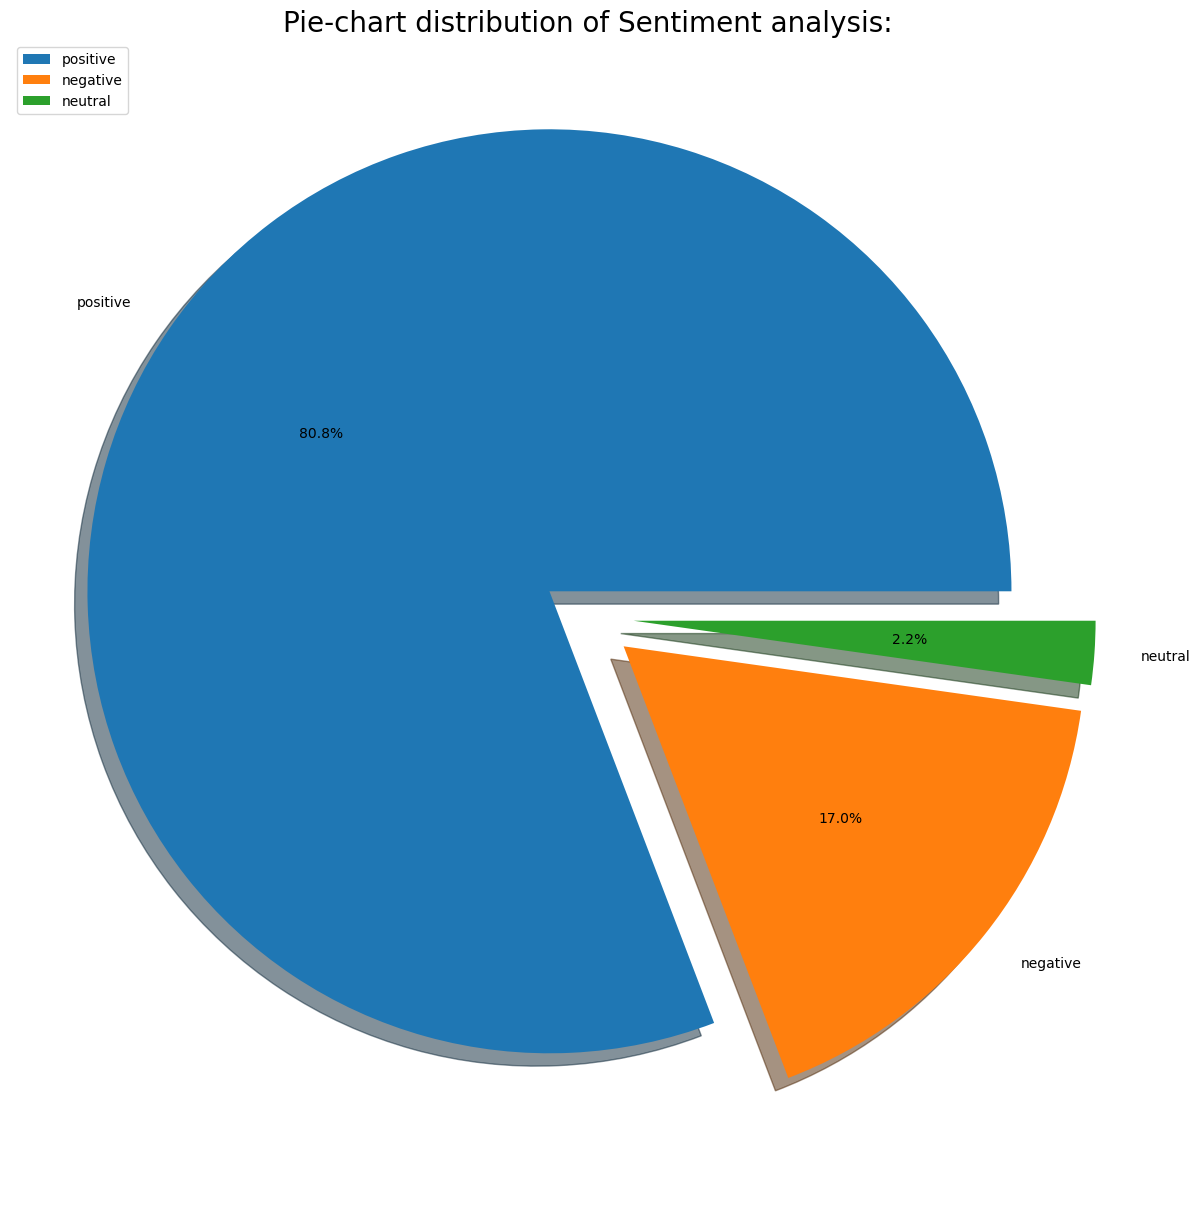

In [142]:
plt.figure(figsize=(15, 15))
sentiment = data['Sentiment'].value_counts()
explode = (0.1, 0.1, 0.1)
labels = ['positive', 'negative', 'neutral']
title = 'Pie-chart distribution of Sentiment analysis:'

plt.pie(sentiment, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title(title, fontsize=20)
plt.axis('off')
plt.legend(loc="upper left")
plt.show()